In [98]:
#pip install beautifulsoup4
#라이브러리가 없는 경우 주석 지우고 설치

In [99]:
#pip install requests
#라이브러리가 없는 경우 주석 지우고 설치

In [100]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
from PIL import Image
from io import BytesIO

In [101]:
user_name = input('깃허브 닉네임을 입력하세요 : ')
git_url = 'https://github.com/'+user_name
req = requests.get(git_url)
soup = bs(req.content, 'html.parser')
user_img_url = soup.find('img', {'alt' : 'Avatar'})['src']
res_2 = requests.get(user_img_url)
request_get_img = Image.open(BytesIO(res_2.content))

깃허브 닉네임을 입력하세요 : kensukepark


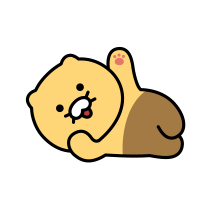

In [102]:
request_get_img

In [103]:
repo_html = soup.find_all('span', 'repo')
print(user_name+ '의 깃허브에 고정된 Repositories 목록')
for i in range(0,len(repo_html)):
  print(repo_html[i].text)

kensukepark의 깃허브에 고정된 Repositories 목록
pre_coin_prepare
Cryptocurrency_Wallet_App
weather_app
Music_Player_App
EMNIST_CNN_MODEL
emotion_recognition_model


kensukepark의 프로그래밍 언어 사용 비율


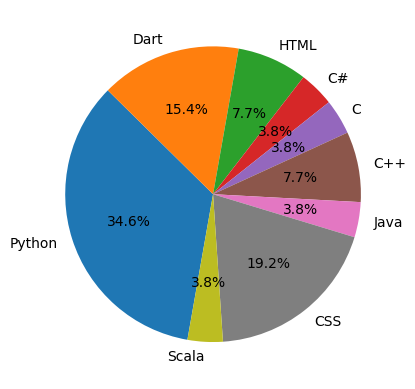

In [104]:
repo_url = git_url + '?tab=repositories'
req = requests.get(repo_url)
soup = bs(req.content, 'html.parser')
language_html = soup.find_all('span', {'itemprop' : 'programmingLanguage'})
language_list = []
ratio = []
language = []
for i in range(0,len(language_html)):
  if language_html[i].text == 'Jupyter Notebook': #주피터 노트북의 경우 파이썬으로 처리
    language_list.append('Python')
  else:
    language_list.append(language_html[i].text)
for j in range(0,len(language_list)):
  if language_list[j] not in language:
    language.append(language_list[j])
    ratio.append(1)
  else:
    ratio[language.index(language_list[j])]+=1

idx=2
#2페이지 이상의 레포지토리를 갖고있는 경우를 크롤링
while True:
  next_url = git_url + '?page='+str(idx)+'&tab=repositories'
  req = requests.get(next_url)
  soup = bs(req.content, 'html.parser')
  language_html = soup.find_all('span', {'itemprop' : 'programmingLanguage'})
  if len(language_html) == 0:
    break
  else:
    idx+=1
    for j in range(0,len(language_list)):
      if language_list[j] not in language:
        language.append(language_list[j])
        ratio.append(1)
      else:
        ratio[language.index(language_list[j])]+=1

print(user_name+ '의 프로그래밍 언어 사용 비율')
plt.pie(ratio, labels=language, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()